# Telco Churn Prediction

---

#### 1. Introduction

Customer churn is a critical issue for telecom companies as it directly impacts revenue and growth. In this project, I aim to predict which customers are likely to churn using machine learning techniques. The dataset contains information about customer accounts, usage patterns, and whether they churned.

#### Goal: 

Build a predictive model to identify churners with high accuracy and recall.

---

#### 2. Data Loading and Exploration

---


In [105]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv('telco_churn.csv')

# Verify if the model was loaded

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False


In [106]:
# Display basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3323 non-null   float64
 7   Total day calls         3323 non-null   float64
 8   Total day charge        3315 non-null   float64
 9   Total eve minutes       3324 non-null   float64
 10  Total eve calls         3325 non-null   float64
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3332 non-null   float64
 14  Total night charge      3333 non-null   

In [107]:
# Check for missing values

print(df.isnull().sum())

State                      0
Account length             0
Area code                  0
International plan         0
Voice mail plan            0
Number vmail messages      0
Total day minutes         10
Total day calls           10
Total day charge          18
Total eve minutes          9
Total eve calls            8
Total eve charge           0
Total night minutes        0
Total night calls          1
Total night charge         0
Total intl minutes         0
Total intl calls           0
Total intl charge          5
Customer service calls     5
Churn                      8
dtype: int64


#### 3. Data Cleaning

---

In [108]:
# Remove spaces and lowercase the column names to make them easier to use

df.columns = [col.lower().replace( ' ', '_') for col in df.columns]

# Drop unnecessary variables such as 'area_code' and 'state'
    # 'state' has too many different values and dropping that variable might help to reduce the complexity the model
    # 'are_code' is just not relevant for the model as the correlation with churn is very low

df.drop(columns=['state', 'area_code'], inplace=True)

# Fill null values

null_col_values = ['total_day_minutes', 'total_day_calls', 'total_day_charge', 
                   'total_eve_minutes', 'total_eve_calls', 'total_night_calls',
                   'total_intl_charge', 'customer_service_calls']

for i in null_col_values:
    df[i] = df[i].fillna(0)

churn_mode = df['churn'].mode()[0]      # Find the mode for churn

df['churn'] = df['churn'].fillna(churn_mode)

# Convert categorical and target variables into binaries

categorical_columns = ['international_plan', 'voice_mail_plan']

for col in categorical_columns:
    df[col] = df[col].map({'Yes':1, 'No':0})


df['churn'] = df['churn'].map({True:1, False:0})        # target variables ('churn)

# Verify changes

df.head()

/var/folders/ql/sj4bkw7j513d178m0wgns4mh0000gn/T/ipykernel_50356/2197641570.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].fillna(churn_mode)


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,0,1,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,0
1,107,0,1,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,0
2,137,0,0,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,0
3,84,1,0,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,0
4,75,1,0,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,0


In [109]:
# Verify the existence of missing values

df.isnull().sum()

account_length            0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

#### 4. Feature Engineering

---

In [110]:
# Correct the type of each column (if necessary)

change_col_type = ['total_day_calls', 'total_eve_calls', 'total_night_calls',
                    'total_intl_calls', 'customer_service_calls']

for col in change_col_type:
    df[col] = df[col].astype(int)

# Create and additional columns 'total_XYZ' it might be also relevant for the prediction model (XZY = charge | minutes | calls)

df['total_charge'] = df[['total_day_charge',
                      'total_eve_charge',
                      'total_night_charge',
                      'total_intl_charge']].sum(axis=1)         # Total charge

df['total_charge']

df['total_minutes'] = df[['total_day_minutes', 'total_eve_minutes',
                          'total_night_minutes', 'total_intl_minutes']].sum(axis = 1)        # Total minutes

df['total_calls'] = (df['total_intl_calls'] + 
                     df['total_night_calls'] +
                     df['total_eve_calls'] +
                     df['total_day_calls'])         # Total calls (it's a different way of making a sum - i'm just showing off)

# Verify changes

df.head()





,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_minutes,total_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,75.56,717.2,303
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,59.24,625.2,332
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,62.29,539.4,333
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,66.80,564.8,255
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,52.09,512.0,359


In [111]:
# Verify changes of type

df.dtypes

account_length              int64
international_plan          int64
voice_mail_plan             int64
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                       int64
total_charge              float64
total_minutes             float64
total_calls                 int64
dtype: object

#### 5. Exploratory Data Analysis (EDA)

---

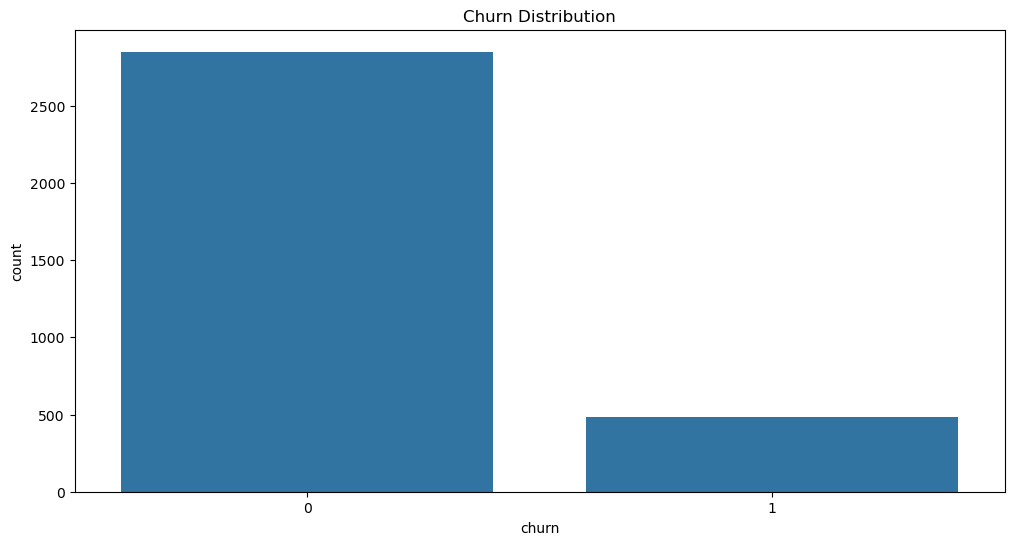

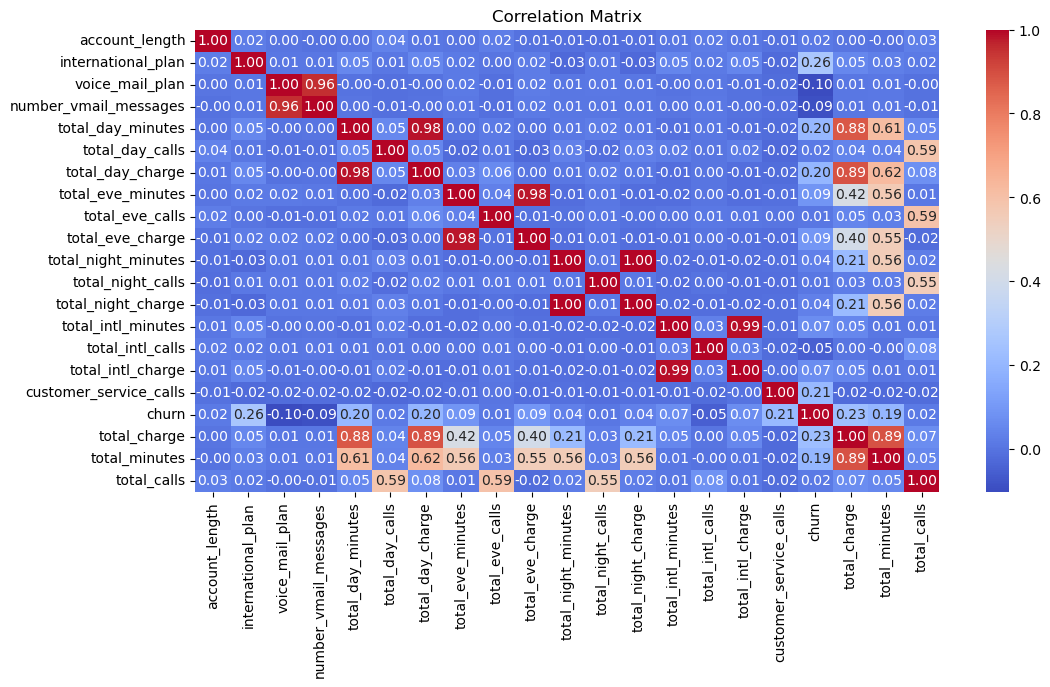

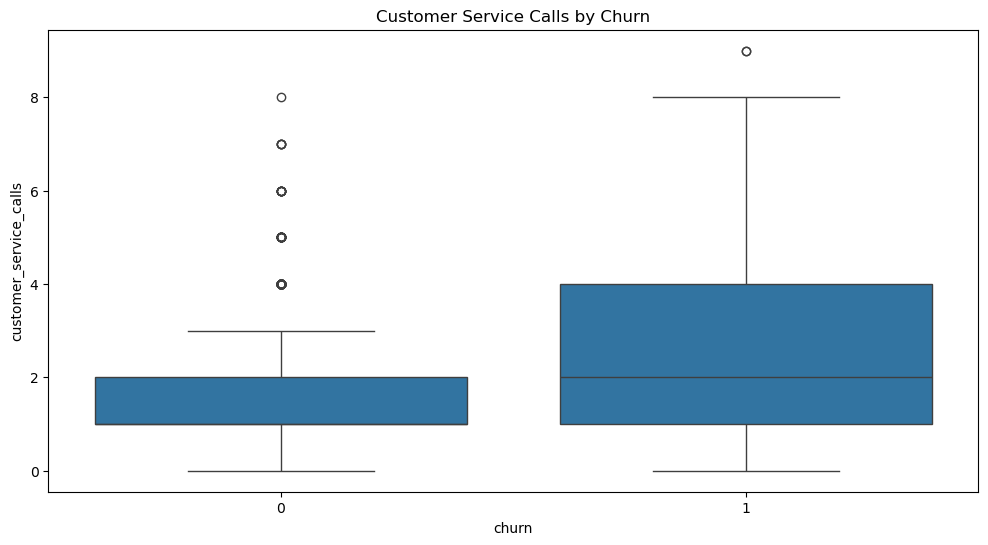

In [114]:
# Distribution of churn

plt.figure(figsize = (12, 6))
sns.countplot(
    data = df,
    x = 'churn'
    )
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap

plt.figure(figsize = (12, 6))
corr_matrix = df.corr()
sns.heatmap(
    data = corr_matrix, 
    annot = True, 
    cmap = 'coolwarm',
    fmt = '.2f'
    )
plt.title('Correlation Matrix')
plt.show()

# Compare churn vs. no churn

churned = df[df['churn'] == 1]
not_churned = df[df['churn'] == 0]

plt.figure(figsize = (12, 6))
sns.boxplot(
    data = df,
    x = 'churn', 
    y = 'customer_service_calls'
    )
plt.title('Customer Service Calls by Churn')
plt.show()

#### 6. Model Building

---

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data

x = df.drop(columns=['churn'])
y = df['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

# Train a Random Forest model

rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=69)
rf_model.fit(x_train, y_train)

# Make predictions

y_pred = rf_model.predict(x_test)

#### 7. Model Evaluation

In [118]:
# Evaluate the model

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       563
           1       1.00      0.91      0.95       104

    accuracy                           0.99       667
   macro avg       0.99      0.96      0.97       667
weighted avg       0.99      0.99      0.99       667

Confusion Matrix:
[[563   0]
 [  9  95]]


#### 8. Conclusion

The Random Forest model achieved exceptional performance with an overall accuracy of 99% and a recall of 91% for churn detection. The model demonstrates perfect precision for both classes, ensuring no false positives for churn while identifying the vast majority of actual churn cases.

This high level of performance makes the model highly reliable for detecting customer churn in real-world scenarios. With only 9 false negatives out of 104 actual churn cases, the model effectively minimizes the risk of overlooking potential churners, which is critical for businesses aiming to retain customers.

---

### About the Author

**Name:** Sebastian Mondragon  

- **Email:** basmondragon@proton.me
- **Telegram:** [https://t.me/basmondragon](https://t.me/basmondragon)
- **LinkedIn:** [https://www.linkedin.com/in/basmondragon/](https://www.linkedin.com/in/basmondragon/)

#### Skills

- **Programming Languages:** Python, SQL  
- **Libraries & Frameworks:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, XGBoost  
- **Methodologies:** Data Cleaning, Feature Engineering, Machine Learning, Model Evaluation  
- **Soft Skills:** Problem-Solving, Analytical Thinking, Communication  

#### Acknowledgments

This project was inspired by my passion for applying machine learning to solve business challenges.

#### Next Steps

If you have any feedback or suggestions for improving this project, feel free to reach out to me via email or LinkedIn. I’m always open to learning and collaborating on new ideas!  

Feel free to explore my other projects on GitHub: [https://github.com/basmondragon](https://github.com/basmondragon)